In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import matplotlib.pyplot as plt
sns.set_theme()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
import graphviz
from sklearn.model_selection import cross_val_score
d= pd.read_csv('student-mat.csv',sep=";")

In [4]:
d

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


Next we add columns for pass and fail. The data in these columns would contain 1 or 0, where 1 means pass and 0 means fail.

We are going to do that by computing with every row what the sum of the test scores would be. This will be calculated as if the sum of three score is greater than or equal to 35, 1 is given to the student and failing to that rule 0 is given to the student. 

//To do this we will use **apply** function (a feature of Pandas) to apply this rule on every row of the dataset. Here axis=1 means use apply per row and axis=0 would mean apply per column. The next line means that a variable needs to be dropped: either G1, G2, G3.

In [5]:
d['pass']=d.apply(lambda row:1 if(row['G1']+row['G2']+row['G3'])>=35 else 0,axis=1)
d.drop(['G2','G1','G3'],axis=1,inplace=True)

In [6]:
d

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,0


*As* mentioned before, some of these columns are words or phrases, such as Mjob, Fjob, internet, and romantic. These columns need to be converted into numbers so we use **one-hot encoding** method, which can be done using the **get_dummies** function (a Pandas feature), and we need to mention which columns are the ones that we want to turn into numeric form.

In the case of Mjob, for example, the function it is going to look at all the different possible answers or the values in that column and it's going to give each value a column name. These columns will receive names such as rename the columns to Mjobat_home, Mjobhealth, or Mjob. These new columns, for example, the Mjobat_home column will have value 1 and the rest will have 0. This means only one of the new columns generated will have one.

In [7]:
d=pd.get_dummies(d,columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
 'nursery', 'higher', 'internet', 'romantic'])
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


## Build models

Now we will show you another way to split the data.
We will shuffle the rows and produce a training set with first 500 rows and rest 149 rows for test set and then we just need to get attributes form the training set which means we will get rid of the pass column and save the pass column separately. The same is repeated for the testing set. We will apply the attributes to the entire dataset and save the pass column separately for the entire dataset. 

Now we will find how many passed and failed from the entire dataset. This can be done by computing the percentage number of passed and failed which will give us a result of 328 out of 649. This being the pass percentage which is roughly around 50% of the dataset. This constitutes a well-balanced dataset:

In [8]:
#shuffle rows
d=d.sample(frac=1)
#split training amd testing data
d_train = d[:500]
d_test = d[500:]

d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

#number of passing students in whole dataset
print("Passing: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))

Passing: 166 out of 395 (42.03%)


# We will perform multi-class classification through `DecisionTreeClassifier` from *scikit-learn* package
#Here we will use the entropy or information gain metric to decide when to split. We will split at a depth of five questions, by using max_depth=5 as an initial tree depth to get a feel for how the tree is fitting the data

In [9]:
#fit a decision tree
t =    
t = t.fit(d_train_att, d_train_pass)

In [10]:
# save tree
dot_data = tree.export_graphviz(t, out_file="student_performance.dot", label="all", impurity=False, proportion=True,
                     feature_names=list(d_train_att), class_names=["fail", "pass"],
                     filled=True, rounded=True)

The result we had was approximately 68%. Now let's cross verify the result.

In [11]:
scores = cross_val_score(t, d_att, d_pass, cv=5)
#show avarage score and +/- two standered deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.56 (+/- 0.13)


Now let's use various `max_depth` values from 1 to 20, Considering we make a tree with one question or with 20 questions having depth value of 20 which will give us questions more than 20 which is you will have to go 20 steps down to reach a leaf node.

Then we will perform cross-validation and save and print our answer

In [12]:
for max_depth in range(1, 20):
    t=tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    print("Max depth: %d, Accurecy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() * 2))

Max depth: 1, Accurecy: 0.58 (+/- 0.01)
Max depth: 2, Accurecy: 0.56 (+/- 0.07)
Max depth: 3, Accurecy: 0.56 (+/- 0.07)
Max depth: 4, Accurecy: 0.55 (+/- 0.07)
Max depth: 5, Accurecy: 0.56 (+/- 0.11)
Max depth: 6, Accurecy: 0.57 (+/- 0.11)
Max depth: 7, Accurecy: 0.56 (+/- 0.08)
Max depth: 8, Accurecy: 0.54 (+/- 0.07)
Max depth: 9, Accurecy: 0.55 (+/- 0.07)
Max depth: 10, Accurecy: 0.55 (+/- 0.07)
Max depth: 11, Accurecy: 0.57 (+/- 0.06)
Max depth: 12, Accurecy: 0.57 (+/- 0.05)
Max depth: 13, Accurecy: 0.57 (+/- 0.09)
Max depth: 14, Accurecy: 0.57 (+/- 0.10)
Max depth: 15, Accurecy: 0.57 (+/- 0.08)
Max depth: 16, Accurecy: 0.58 (+/- 0.12)
Max depth: 17, Accurecy: 0.58 (+/- 0.11)
Max depth: 18, Accurecy: 0.58 (+/- 0.11)
Max depth: 19, Accurecy: 0.57 (+/- 0.09)


Max depth=5 is the best which was compared accuracy from the average we found earlier.

In [13]:
## Let's visualize the output

In [14]:
depth_acc = np.empty((19,3), float)
i=0
for max_depth in range(1, 20):
    t=tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std() * 2
    i +=1

depth_acc

array([[1.00000000e+00, 5.79746835e-01, 1.01265823e-02],
       [2.00000000e+00, 5.64556962e-01, 6.71721477e-02],
       [3.00000000e+00, 5.64556962e-01, 6.71721477e-02],
       [4.00000000e+00, 5.56962025e-01, 7.51007442e-02],
       [5.00000000e+00, 5.59493671e-01, 1.13670604e-01],
       [6.00000000e+00, 5.77215190e-01, 9.94778871e-02],
       [7.00000000e+00, 5.59493671e-01, 9.92198377e-02],
       [8.00000000e+00, 5.39240506e-01, 8.71121546e-02],
       [9.00000000e+00, 5.44303797e-01, 7.33740595e-02],
       [1.00000000e+01, 5.49367089e-01, 6.90540845e-02],
       [1.10000000e+01, 5.64556962e-01, 5.90476141e-02],
       [1.20000000e+01, 5.79746835e-01, 8.06955820e-02],
       [1.30000000e+01, 5.67088608e-01, 7.90911360e-02],
       [1.40000000e+01, 5.72151899e-01, 9.39100607e-02],
       [1.50000000e+01, 5.79746835e-01, 1.13670604e-01],
       [1.60000000e+01, 5.72151899e-01, 1.05481856e-01],
       [1.70000000e+01, 5.64556962e-01, 1.12764848e-01],
       [1.80000000e+01, 5.69620

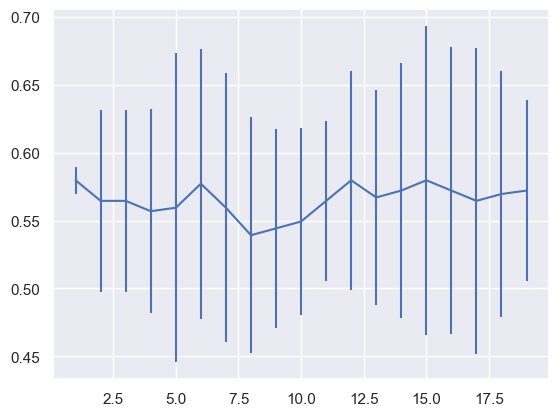

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.show()

The error bars shown in the following screenshot are the standard deviations in the score, which concludes that a depth of 5 is ideal for this dataset. and our assumption of 5 was correct.


Also this graph telling us more depth doesn't give any more power.